## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

## Read Data

In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

## Check Data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Exploration

In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

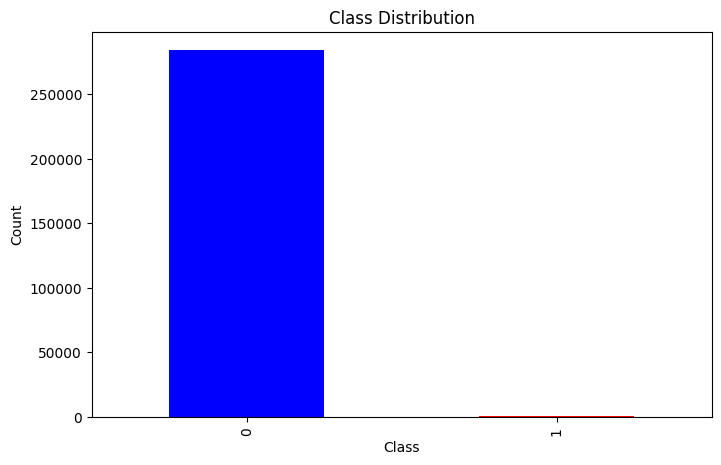

In [5]:
plt.figure(figsize = (8,5))
df['Class'].value_counts().plot(kind = 'bar',color = ['blue','red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Check Missing Data

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.isnull().sum()/df.isnull().count()*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [8]:
df.shape

(284807, 31)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


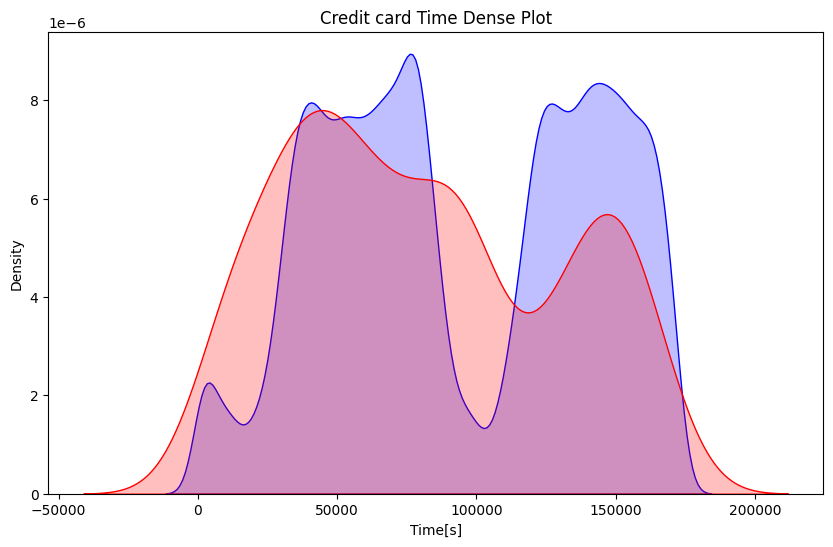

In [10]:
class_0 = df.loc[df['Class'] == 0]['Time']
class_1 = df.loc[df['Class'] == 1]['Time']

plt.figure(figsize=(10,6))
sns.kdeplot(class_0,label = 'Not Fraud',color = 'blue',fill = True)
sns.kdeplot(class_1,label = 'Fraud',color = 'red',fill = True)
plt.title('Credit card Time Dense Plot')
plt.xlabel('Time[s]')
plt.ylabel('Density')
plt.show()

In [11]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x/3600))

tmp = df.groupby(['Hour','Class'])['Amount'].agg(['min','max','count',
                                                  'sum','mean','median','var']).reset_index()
tmp_df = pd.DataFrame(tmp)
tmp_df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
tmp_df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


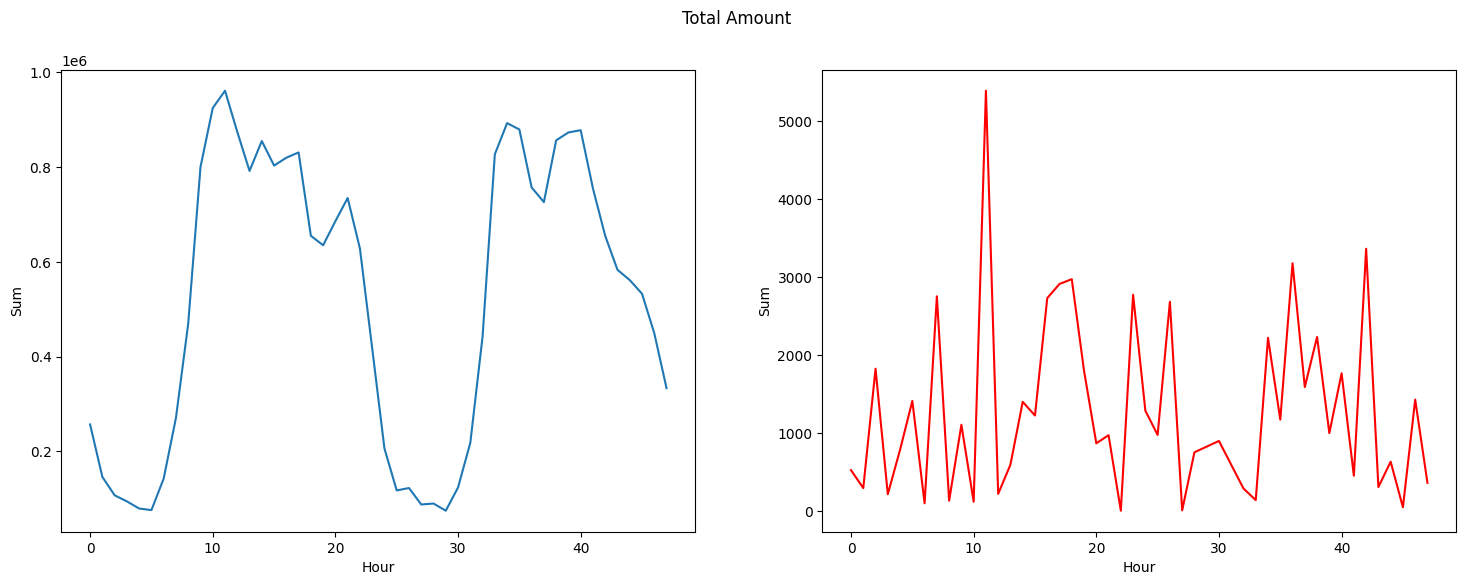

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

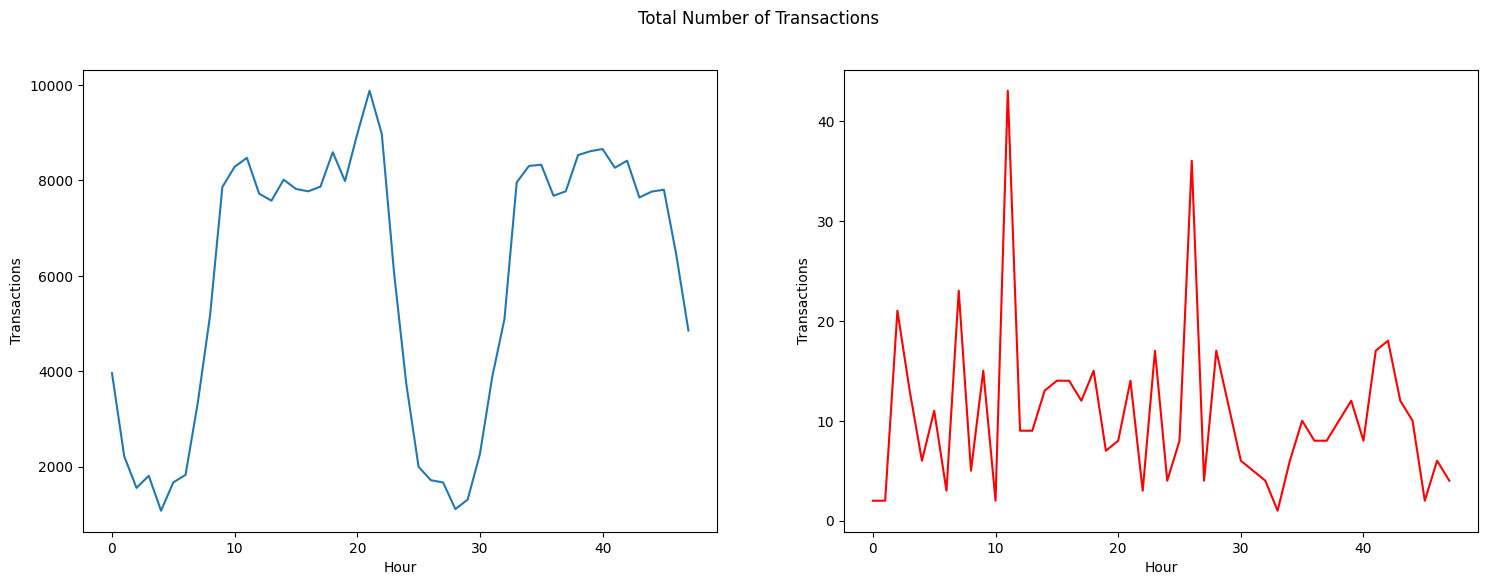

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

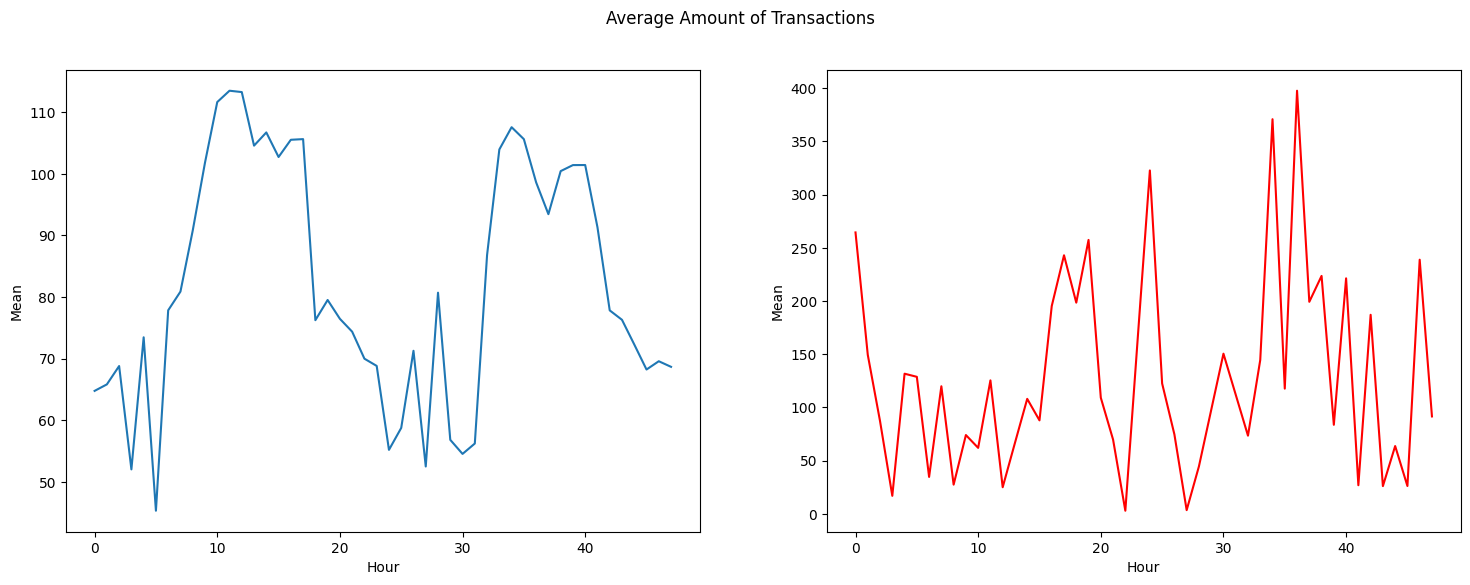

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

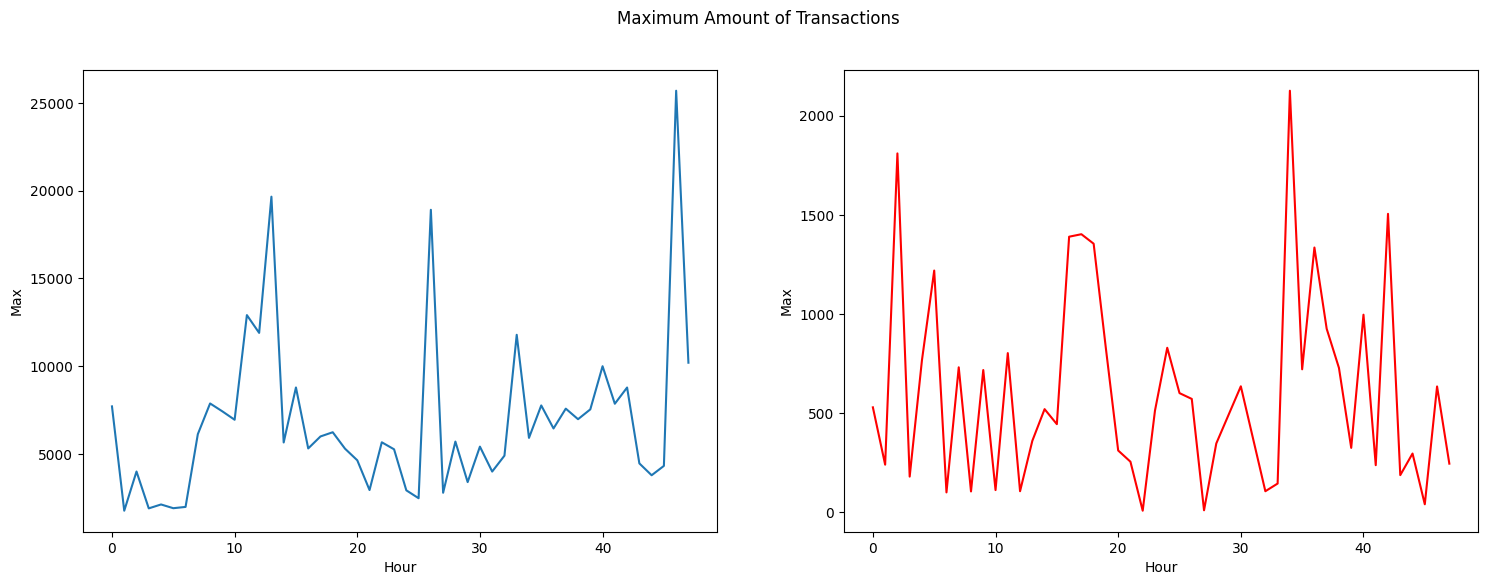

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

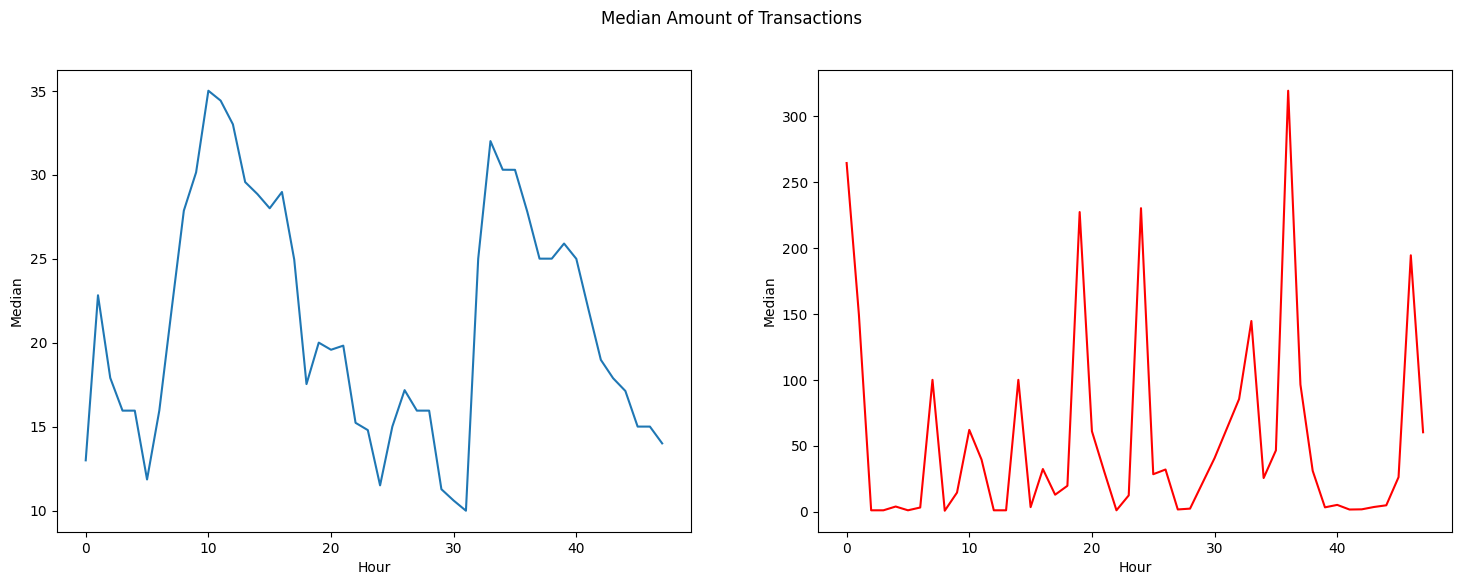

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

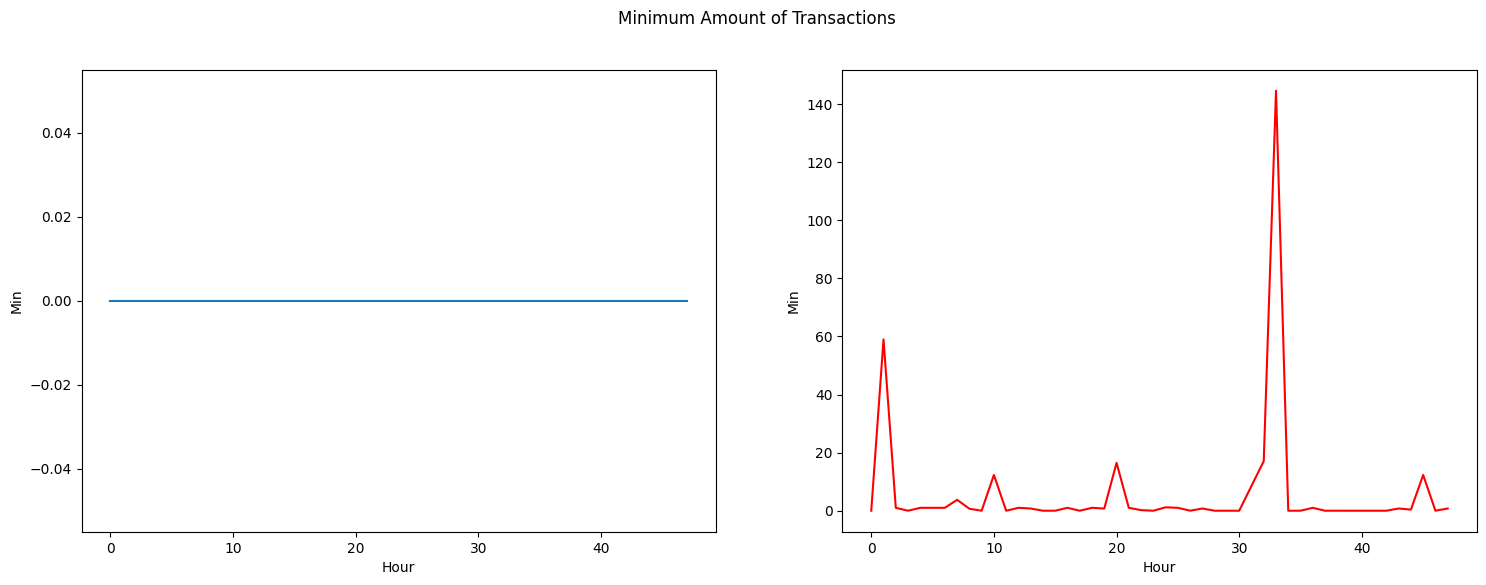

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

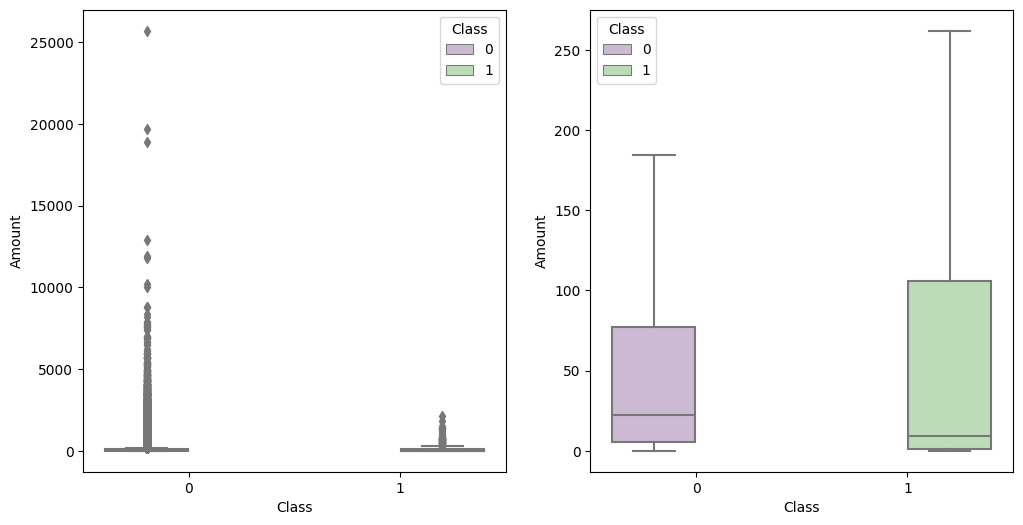

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [19]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

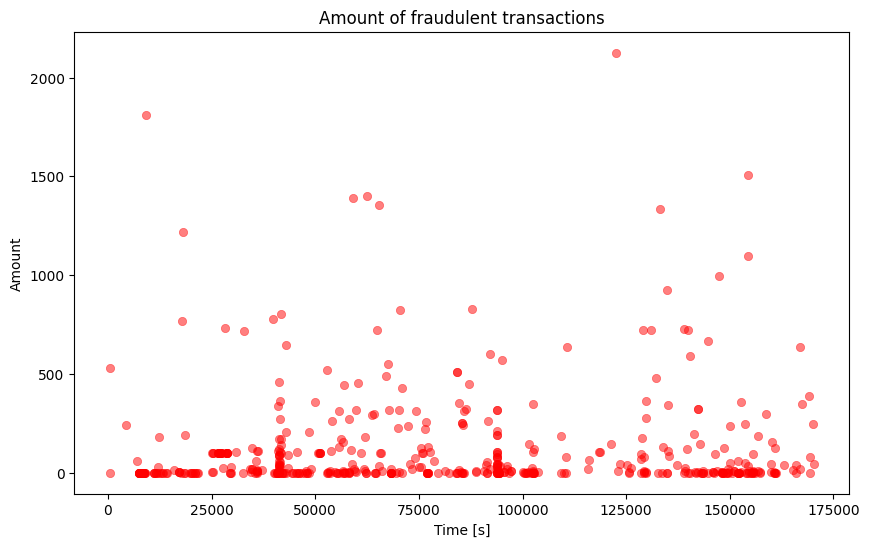

In [21]:
fraud = df.loc[df['Class'] == 1]

plt.figure(figsize=(10, 6))

sns.scatterplot(x=fraud['Time'], y=fraud['Amount'], color='red', alpha=0.5, edgecolor='red')
plt.title('Amount of fraudulent transactions')
plt.xlabel('Time [s]')
plt.ylabel('Amount')

plt.show()


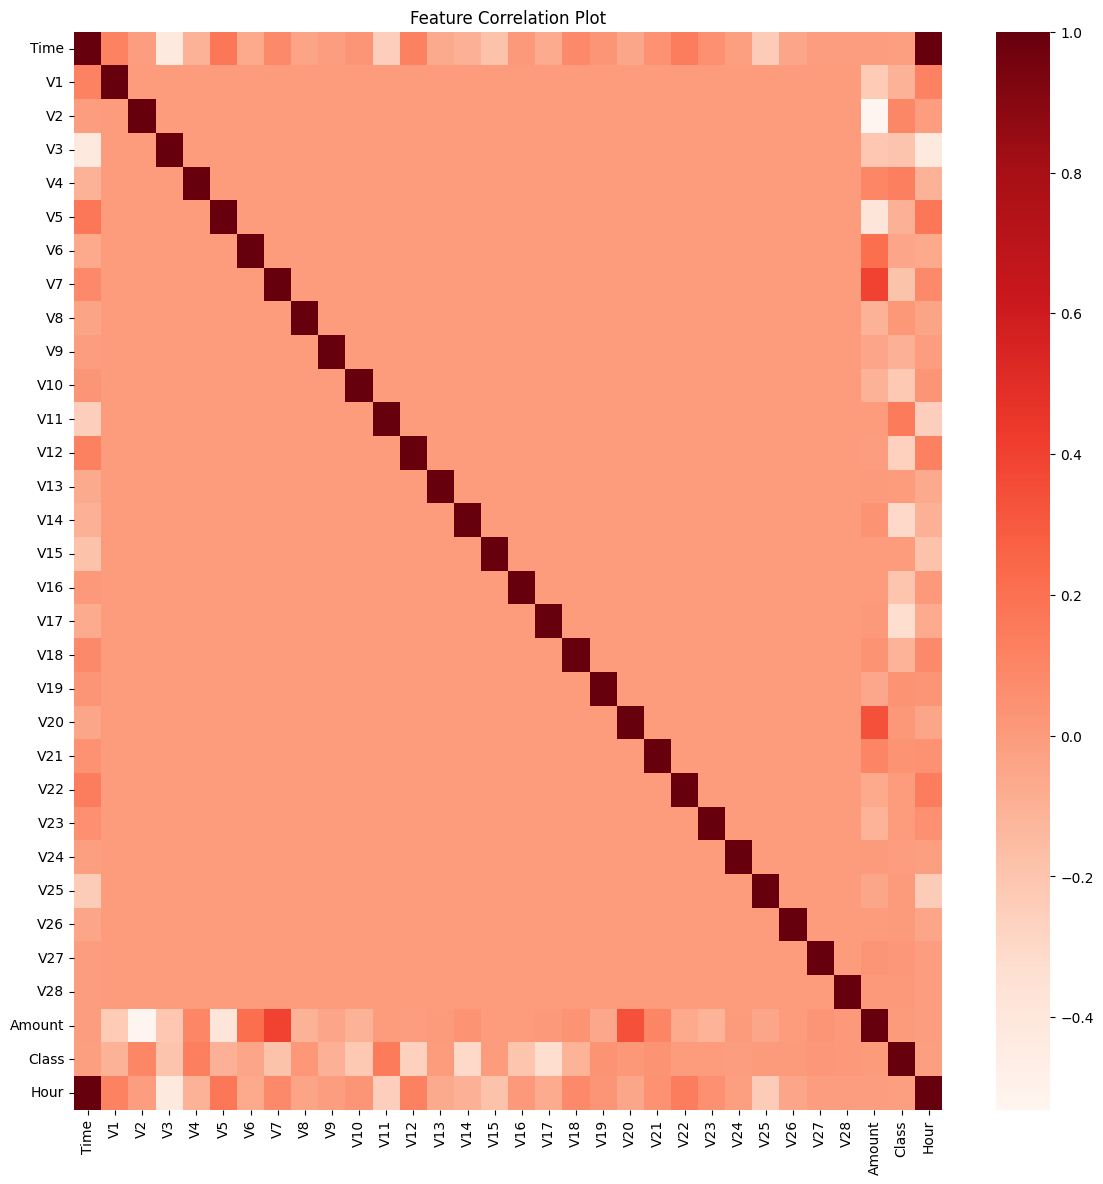

In [22]:
plt.figure(figsize= (14,14))
plt.title('Feature Correlation Plot')
corr = df.corr()
sns.heatmap(corr, cmap = 'Reds')
plt.show()

#### As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

## Model Building

In [23]:
x = df.drop('Class',axis = 1)
y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

## Model 1: RandomForestClassifier

In [24]:
clf = RandomForestClassifier(n_jobs =4, random_state = 42,
                            criterion = 'gini', n_estimators = 100,
                            verbose = False)

clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [25]:
y_pred = clf.predict(x_test)

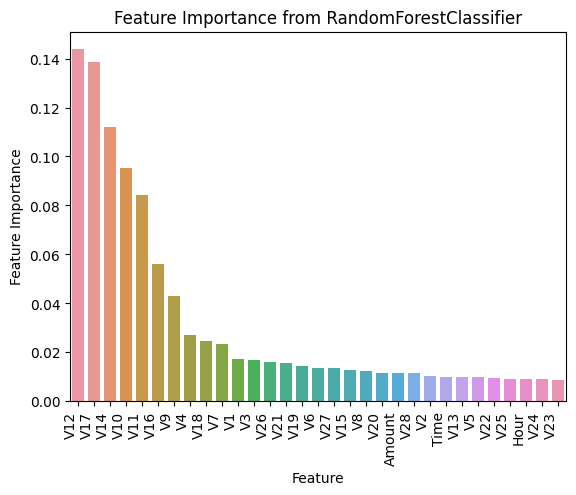

In [26]:
tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature Importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp)
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

#### The most important features are V12, V17, V14, V10, V11, V16.

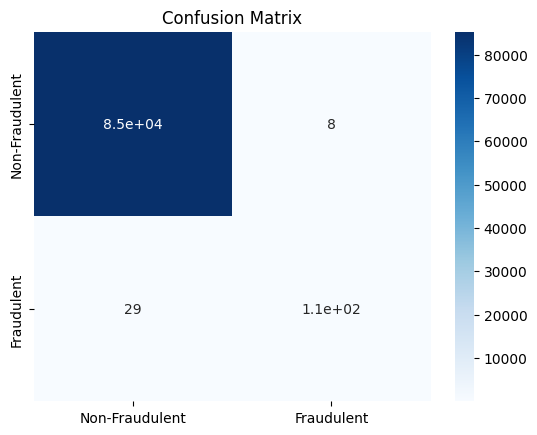

In [27]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.show();

In [28]:
roc_auc_score(y_test,y_pred)

0.8933354634713792

## The ROC-AUC score obtained with RandomForrestClassifier is 0.89.

# Model 2: AdaBoostClassifier

In [29]:
clf = AdaBoostClassifier(random_state=32,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=100)
clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=32)

In [30]:
y_pred = clf.predict(x_test)

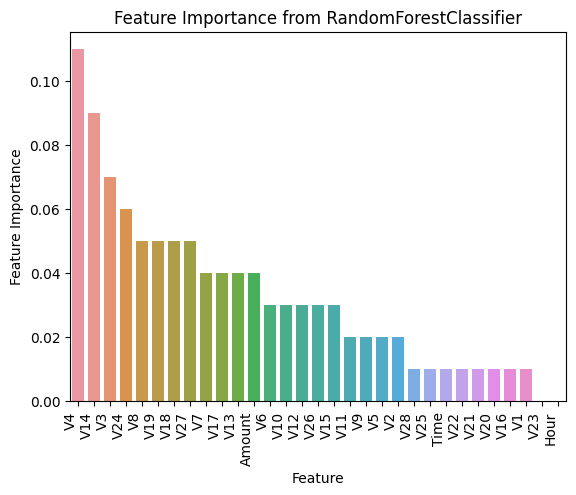

In [31]:
tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature Importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp)
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

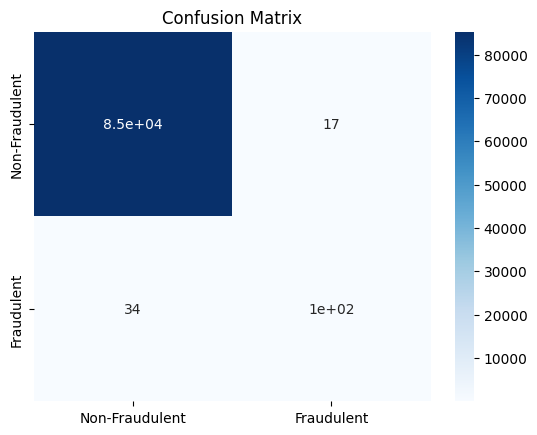

In [32]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.show();

In [33]:
roc_auc_score(y_test,y_pred)

0.8749003598766807

### The ROC-AUC score obtained with AdaBoostClassifier is 0.87.

## Model 3:CatBoostClassifier

#### CatBoostClassifier is a gradient boosting for decision trees algorithm with support for handling categorical data

In [34]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 100,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)
clf.fit(x_train,y_train)

0:	total: 454ms	remaining: 3m 46s
50:	total: 19.3s	remaining: 2m 50s
100:	total: 37.8s	remaining: 2m 29s
150:	total: 56s	remaining: 2m 9s
200:	total: 1m 13s	remaining: 1m 49s
250:	total: 1m 30s	remaining: 1m 30s
300:	total: 1m 48s	remaining: 1m 11s
350:	total: 2m 6s	remaining: 53.7s
400:	total: 2m 24s	remaining: 35.7s
450:	total: 2m 42s	remaining: 17.7s
499:	total: 3m	remaining: 0us


In [35]:
y_pred = clf.predict(x_test)

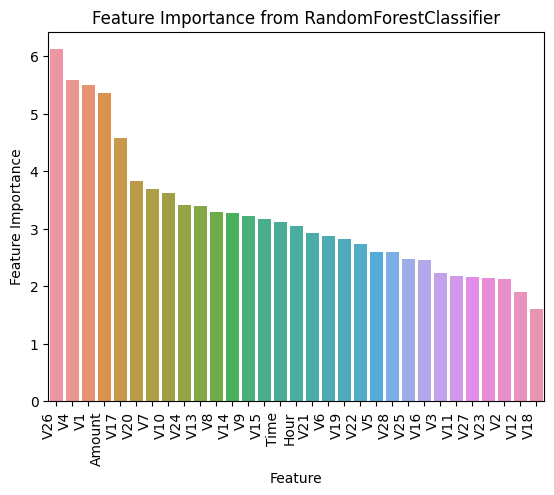

In [36]:
tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature Importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp)
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

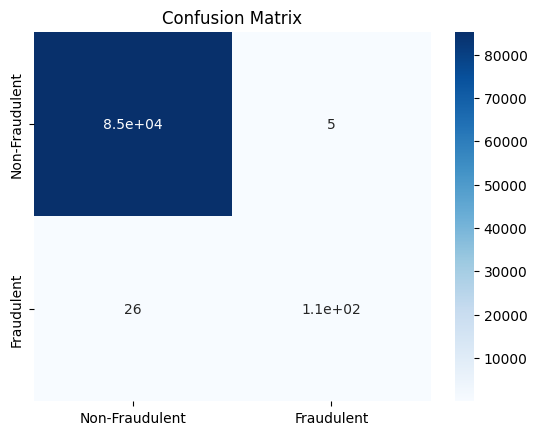

In [37]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.show();

In [38]:
roc_auc_score(y_test,y_pred)

0.904382458787259

### The ROC-AUC score obtained with CatBoostClassifier is 0.90.

## Model 4:LGBMClassifier

In [39]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  
          'max_depth': 4,  
          'min_child_samples': 100,  
          'max_bin': 100,  
          'subsample': 0.9,  
          'subsample_freq': 1, 
          'colsample_bytree': 0.7, 
          'min_child_weight': 0,
          'min_split_gain': 0,
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150,
         }

clf = lgb.LGBMClassifier(**params)
clf.fit(x_train,y_train)

[LightGBM] [Warning] num_threads is set with nthread=8, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=8, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045377 seconds.
You can set `force_col_wise=true` to remove the overhead.


LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, max_bin=100,
               max_depth=4, metric='auc', min_child_samples=100,
               min_child_weight=0, min_split_gain=0, nthread=8, num_leaves=7,
               objective='binary', scale_pos_weight=150, subsample=0.9,
               subsample_freq=1, verbose=0)

In [40]:
y_pred = clf.predict(x_test)

### Confusion Matrix

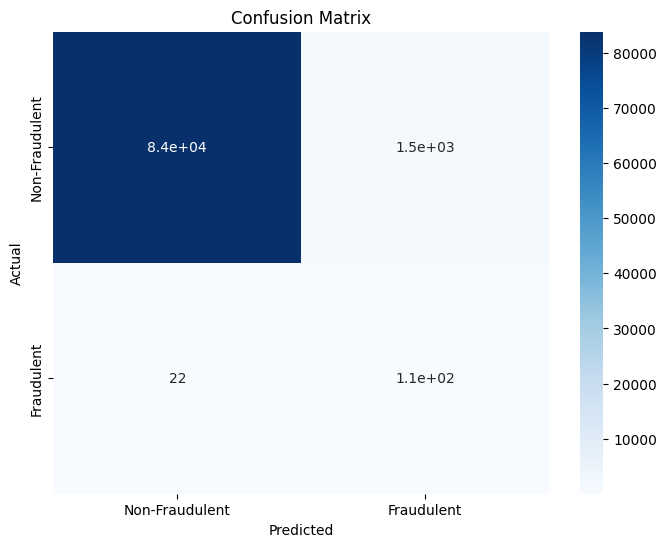

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

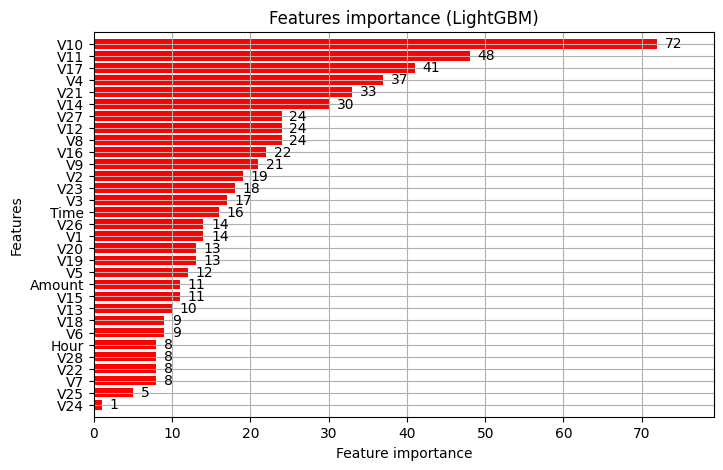

In [42]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(clf, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

In [43]:
roc_auc_score(y_test,y_pred)

0.9105017069835659

### The ROC-AUC score obtained for the test set is 0.91.

# Conclusion

### We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features.

### We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.89 when predicting the target for the test set.

### We followed with an AdaBoostClassifier model, with lower AUC score (0.87) for prediction of the test set target values.

### We then followed with an CatBoostClassifier, with the AUC score after training 500 iterations 0.90.

### We then presented the data to a LightGBM model, and got AUC score of 0.91.